In [1]:
import numpy as np
import flopy
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf

%matplotlib notebook


# make the screen bigger!
from IPython.display import display, HTML
display(HTML(data=""" <style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 85%; }
    div#maintoolbar-container { width: 99%; } </style> """))

In [3]:
# Assign name and create modflow model object
txtname = 'test_no_4'
model_name = flopy.modflow.Modflow(txtname, exe_name='mf2005')

# Load up MODFLOW files from GMS into flopy
these files need to be in the working directory, or can be pointed to 

In [4]:
dis = flopy.modflow.ModflowDis.load('TutCoast_simple4.dis', model_name)       # this command is neededed to load an existing .dis file   (essentially is grid geometry)
bas = flopy.modflow.ModflowBas.load('TutCoast_simple4.ba6',model_name)        #  load an existing .basic package                         (essentially is ibound and starting heads)
lpf = flopy.modflow.ModflowLpf.load('TutCoast_simple4.lpf', model_name)       #  load an existing .lpf file    
rch = flopy.modflow.ModflowRch.load('TutCoast_simple4.rch', model_name)


# addd the well package
wel = flopy.modflow.ModflowWel.load('TutCoast_simple4.wel', model_name)

# not sure why these generate different results
   # Add PCG package to the MODFLOW model
#pcg = flopy.modflow.ModflowPcg.load('TutCoast_simple3.pcg', model_name)    # COMMENT ONE OF THESE OUT
# Add PCG package to the MODFLOW model
pcg = flopy.modflow.ModflowPcg(model_name)

In [5]:
# Add OC package to the MODFLOW model
spd = {(0, 0): ['print head', 'print budget', 'save head', 'save budget']}
oc = flopy.modflow.ModflowOc(model_name, stress_period_data=spd, compact=True)

In [6]:
# Write the MODFLOW model input files
model_name.write_input()

In [7]:
# Run the MODFLOW model
success, buff = model_name.run_model()

FloPy is using the following executable to run the model: mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.11.00 8/8/2013                        

 Using NAME file: test_no_4.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/04/24 22:07:28

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2018/04/24 22:07:28
 Elapsed run time:  0.055 Seconds

  Normal termination of simulation


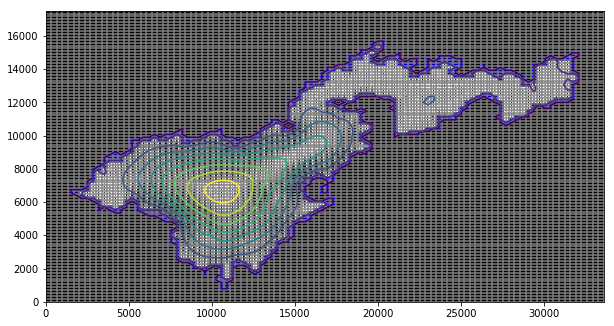

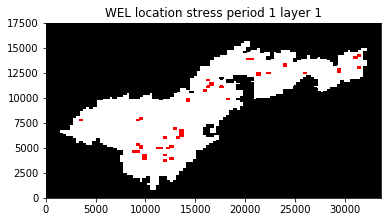

In [8]:
# Post process the results

hds = bf.HeadFile(txtname + '.hds')
head = hds.get_data(totim=1.0)
levels = np.linspace(0, 10, 11)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')

hds = bf.HeadFile(txtname+'.hds')
times = hds.get_times()
head = hds.get_data(totim=times[-1])
levels = np.linspace(0, 10, 11)

cbb = bf.CellBudgetFile(txtname+'.cbc')
kstpkper_list = cbb.get_kstpkper()
frf = cbb.get_data(text='FLOW RIGHT FACE', totim=times[-1])[0]
fff = cbb.get_data(text='FLOW FRONT FACE', totim=times[-1])[0]

modelmap = flopy.plot.ModelMap(model=model_name, layer=0)
qm = modelmap.plot_ibound()
lc = modelmap.plot_grid()
cs = modelmap.contour_array(head, levels=levels)
quiver = modelmap.plot_discharge(frf, fff, head=head)


# plot well location
wel.plot()


#plt.savefig('tutorial1b.png')


In [10]:
hobs = flopy.modflow.ModflowHob.load('TutCoast_simple4.hob', model_name)

ValueError: invalid literal for int() with base 10: '#'

NameError: name 'hobs' is not defined

# getting a better understanding of how to work with Flopy objects

In [143]:
print(vars(dis))   # these are the data held withint the dis package

{'parent': MODFLOW 1 layer(s), 100 row(s), 100 column(s), 1 stress period(s), 'extension': ['dis'], 'file_name': ['test_no_3.dis'], 'fn_path': '.\\test_no_3.dis', 'name': ['DIS'], 'unit_number': [11], 'extra': [''], 'url': 'dis.htm', 'allowDuplicates': False, 'acceptable_dtypes': [<class 'int'>, <class 'numpy.float32'>, <class 'str'>], 'nrow': 100, 'ncol': 100, 'nlay': 1, 'nper': 1, 'heading': '# DIS package for  MODFLOW-2005, generated by Flopy.', 'laycbd': <flopy.utils.util_array.Util2d object at 0x0000018805CE07F0>, 'delr': <flopy.utils.util_array.Util2d object at 0x0000018806EEF4A8>, 'delc': <flopy.utils.util_array.Util2d object at 0x0000018806EEF898>, 'top': <flopy.utils.util_array.Util2d object at 0x0000018806EEF748>, 'botm': <flopy.utils.util_array.Util3d object at 0x0000018806EEF6D8>, 'perlen': <flopy.utils.util_array.Util2d object at 0x0000018806EEF668>, 'nstp': <flopy.utils.util_array.Util2d object at 0x0000018806EEF0F0>, 'tsmult': <flopy.utils.util_array.Util2d object at 0x0

In [144]:
print(vars(wel))   # these are the data held withint the dis package

{'parent': MODFLOW 1 layer(s), 100 row(s), 100 column(s), 1 stress period(s), 'extension': ['wel'], 'file_name': ['test_no_3.wel'], 'fn_path': '.\\test_no_3.wel', 'name': ['WEL'], 'unit_number': [20], 'extra': [''], 'url': 'wel.htm', 'allowDuplicates': False, 'acceptable_dtypes': [<class 'int'>, <class 'numpy.float32'>, <class 'str'>], 'heading': '# WEL package for  MODFLOW-2005, generated by Flopy.', 'ipakcb': 40, 'np': 0, 'specify': False, 'dtype': dtype((numpy.record, [('k', '<i4'), ('i', '<i4'), ('j', '<i4'), ('flux', '<f4'), ('iface', '<f4'), ('qfact', '<f4'), ('cellgrp', '<f4')])), 'options': ['AUX IFACE', 'AUX QFACT', 'AUX CELLGRP'], 'stress_period_data': <flopy.utils.util_list.MfList object at 0x0000018805316518>}


In [160]:
print(vars(wel.stress_period_data)  )  # the locations rates and whatnot from the wells 


{'package': 
    MODFLOW Well Package Class.

    Parameters
    ----------
    model : model object
        The model object (of type :class:`flopy.modflow.mf.Modflow`) to which
        this package will be added.
    ipakcb : int
        A flag that is used to determine if cell-by-cell budget data should be
        saved. If ipakcb is non-zero cell-by-cell budget data will be saved.
        (default is 0).
    stress_period_data : list of boundaries, or recarray of boundaries, or
        dictionary of boundaries
        Each well is defined through definition of
        layer (int), row (int), column (int), flux (float).
        The simplest form is a dictionary with a lists of boundaries for each
        stress period, where each list of boundaries itself is a list of
        boundaries. Indices of the dictionary are the numbers of the stress
        period. This gives the form of:

            stress_period_data =
            {0: [
                [lay, row, col, flux],
           

In [17]:
# can access individual lines
print( wel.stress_period_data[5][0] )
print( wel.stress_period_data[1][1][1] )

(0, 55, 27, -1000.0, 0.0, 1.0, 1.0)
54


<IPython.core.display.Javascript object>


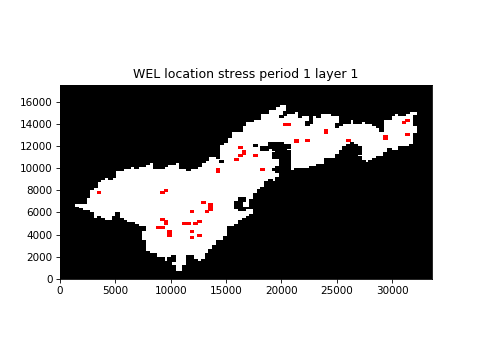

In [18]:
wel.plot()